Test script to run the existing tutorial

In [1]:

import intake
from easygems import healpix as egh
import matplotlib.pyplot as plt
import warnings

In [2]:
list(intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml"))

['CN', 'EU', 'JAPAN', 'NCAR', 'NERSC', 'UK', 'online']

In [3]:
current_location = "online"
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")[current_location]


In [4]:
import pandas as pd

pd.DataFrame(cat["icon_d3hp003"].describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT1H, PT3H, PT6H, P1D]",P1D
1,time_method,time subsetting method,str,"[mean, inst]",mean
2,zoom,zoom resolution of the dataset,int,"[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",0


In [6]:
ds = cat["icon_d3hp003"](zoom=7).to_dask() 

/work/bb1198/b383412/conda/envs/sree_jup/lib/python3.13/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Figure size 640x480 with 0 Axes>

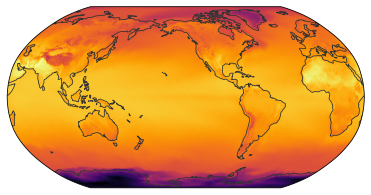

In [7]:
egh.healpix_show(ds["ts"].sel(time="2020-05-10T00:00:00"), cmap="inferno", dpi=72);

/work/bb1198/b383412/conda/envs/sree_jup/lib/python3.13/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


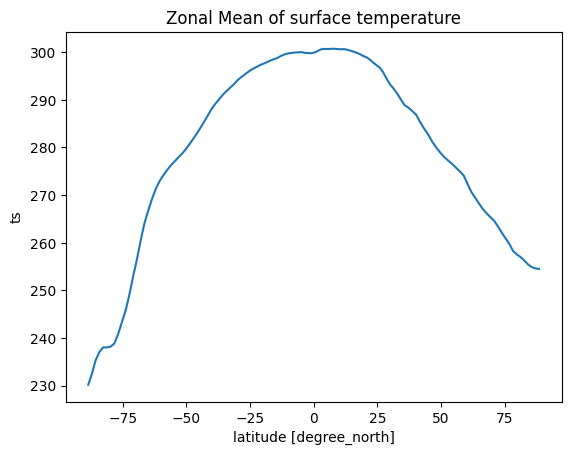

In [8]:
ds = cat["icon_d3hp003"](zoom=5).to_dask() 
# For this analysis, we'll need lat and lon coordinates, here's a way to attach them to the dataset:
ds = ds.rename_dims({'value': 'cell'}).pipe(egh.attach_coords) if 'value' in ds.dims else ds.pipe(egh.attach_coords)

var="ts"
long_name = ds[var].attrs.get("long_name", var)

zm = (
    ds[var]
    .groupby("lat")
    .mean()
).compute()

zm.mean(dim='time').plot()
plt.title(f"Zonal Mean of {long_name}");

In [9]:
var="rlut"
long_name = ds[var].attrs.get("long_name", var)

Slim, Nlim = 15.0, 35.0
da_by_lon = (
    ds[var]
    .where((ds["lat"] > Slim) & (ds["lat"] < Nlim),drop=True)
    .groupby("lon")
    .mean()
).compute()


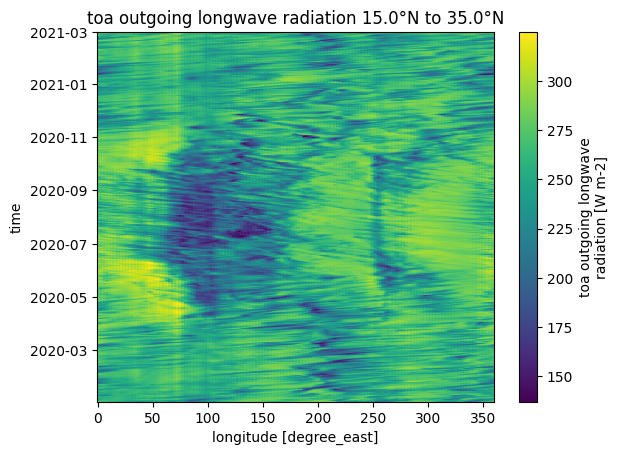

In [10]:
da_by_lon.plot()

latstr=f"{Slim}°N to {Nlim}°N"
plt.title(long_name+" "+latstr);